# Analysis of Craft Breweries and Beers

This projected was created by me (Dennis Elwell) for my *Data: Care, Feeding and Cleaning class*, as part of my *Master's in Science Business Analytics degree*. I created this in Fall 2019.

In this analysis, I will look at several datasets containing information on breweries and beers throughout the world, and I will visualize interesting findings, such as:
 -  The countries and US states with the most number of breweries
 -  The US states with the most number of breweries per 100,000 residents
 -  The cities with the most number of breweries
 -  The breweries with the most number of beers
 -  The most numerous styles of beers by their alcoholo by volume
 -  The most highly rated beers and breweries
 -  The countries, states and cities with the highest ratings

## Getting Started

#### Let's start by importing our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Next, let's import our data
We have three datasets that we downloaded as CSVs from kaggle: Breweries, Beers and Reviews. You can find the source of these data sets by following this url: https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews

In [2]:
breweries = pd.read_csv("breweries.csv")
beers = pd.read_csv("beers.csv")
reviews = pd.read_csv("reviews.csv")

We have one non-beer related dataset on population by US state, which we downloaded from the Census Bureau.

In [3]:
census_data = pd.read_csv("census_data.csv")

#### Let's preview our data, so that we understand what we're working with

__Breweries:__ Our breweries dataset contains info on beer establishments across the world. Each row has a unique identifier. 

In [4]:
#Preview breweries
breweries.head(10)

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"
5,31561,Teddy's Tavern,Seattle,WA,US,No notes at this time.,"Bar, Beer-to-go"
6,35975,Modus Operandi Brewing Co.,Mona Vale,NaN,AU,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
7,5618,Hops! Beer Restaurant & Pizza,Riccione (RN),NaN,IT,No notes at this time.,"Brewery, Bar, Eatery"
8,30916,Kelly's Cellars,Belfast,GB5,GB,No notes at this time.,Bar
9,41278,The Other End,Destin,FL,US,No notes at this time.,"Bar, Eatery"


Under "types," we notice that some rows are identified as breweries, while others are non-breweries.In order for us to work, only with breweries (and not stores or bars), we will drop all rows that do not contain "Brewery" as one of their types

In [5]:
#Drop all rows that do not contain "Brewery" as a type
breweries = breweries[breweries["types"].str.contains('Brewery')]
breweries.head(10)

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
6,35975,Modus Operandi Brewing Co.,Mona Vale,NaN,AU,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
7,5618,Hops! Beer Restaurant & Pizza,Riccione (RN),NaN,IT,No notes at this time.,"Brewery, Bar, Eatery"
13,16995,"Le Bien, Le Malt",Rimouski,QC,CA,No notes at this time.,"Brewery, Bar, Eatery"
16,28685,Brasserie De Puisaye (La Ferme Des Grenouillet...,Saint-Privé,NaN,FR,No notes at this time.,Brewery
18,31986,Power Marketing / Wicked Pissa,Westport,MA,US,No notes at this time.,Brewery
20,8590,Wet Planet Beverage Co.,Utica,NY,US,No notes at this time.,Brewery
21,8070,Gasthausbrauerei Zum Alfons,Schwanenstadt,NaN,AT,No notes at this time.,"Brewery, Eatery"
22,26695,Cervesera Tramuntana,Palma,NaN,ES,No notes at this time.,"Brewery, Bar, Eatery"


Let's check out how many total breweries are in our dataset, and let's see how many unique cities, and countries there are.

In [6]:
#View total number of breweries
print("Number of Breweries:",breweries.shape[0])

#View total number of cities, states, countries and types
print("Number of Cities:", breweries.city.nunique())
print("Number of States:", breweries.state.nunique())
print("Number of Countries:", breweries.country.nunique())

Number of Breweries: 18944
Number of Cities: 8889
Number of States: 67
Number of Countries: 195


__Beers:__ Our beers dataset consists of info on beers from beers across the world. Since each beer has a brewery_id, we will be able to connect this dataset to our brewery dataset later on in our analysis. Each row also has its own unique beer id that is simply called "id".

In [7]:
#Preview beers
beers.head(10)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f
5,8036,World Burp Beer 2002,3469,NaN,JP,Japanese Rice Lager,Limited (brewed once),5.5,No notes at this time.,t
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f
7,345382,Divina IPA,45567,NaN,IT,American IPA,Rotating,6.5,No notes at this time.,f
8,255286,Light Of The Ozarks,11203,AR,US,American Lager,Rotating,4.3,No notes at this time.,f
9,29556,Warrior's Bock,8203,SK,CA,German Bock,Rotating,7.5,No notes at this time.,t


Let's view how many total beers are in our dataset.

In [8]:
#View number of total beers
print("Total Number of Beers:", beers.shape[0])

Total Number of Beers: 358873


We notice that there are many different styles of beer. Let's view how many there are.

In [9]:
#View number of styles of beer
print("Total Number of Styles:", beers["style"].nunique())

Total Number of Styles: 112


We notice that beers can have a retired value of true or false. Let's see how many beers on this list are retired, and how many are not retired.

In [10]:
#View number of beers that are retired vs. active
print("Number of active beers:",beers.retired.value_counts()["f"])
print("Number of retired beers:",beers.retired.value_counts()["t"])

Number of active beers: 240480
Number of retired beers: 118393


__Reviews:__ Our reviews dataset features reviews on beers. Since each review has a beer_id, we will be able to connect this dataset to our beers dataset later on in our analysis.

In [11]:
#preview reviews
reviews.head(10)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
9,125646,Rubenjr,2017-12-14,,4.75,4.50,4.50,4.75,4.50,4.54


This dataset unfortunately does not have a unique identifier for reviews. We should create a new column, called review_id, which will give each row a unique identifier.

In [12]:
#Assign a unique identifier to each review
reviews["review_id"] = reviews.index
reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,review_id
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,0
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50,1
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75,2
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,3
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,4


Let's view how many reviews in total there are, how many beers have a review, and how many people gave a review.

In [13]:
#View total number of reviews
print("Number of Reviews:", reviews.shape[0])

#View number of beers with at least one review
print("Number of Beers with a Review", reviews.beer_id.nunique())

#View number of people who gave at least one review
print("Number of People who Reviewed", reviews.username.nunique())

Number of Reviews: 9073128
Number of Beers with a Review 309542
Number of People who Reviewed 164934


Since there are over 9 million reviews, let's do some quick math to see how many reviews on average each beer had and how many reviews on average each person wrote.

In [14]:
#View average number of reviews per beer
print("Average Number of Reviews per Beer:", round((reviews.shape[0]/reviews.beer_id.nunique()),1))
print("Average Number of Reviews per Reviewer:", round((reviews.shape[0]/reviews.username.nunique()),1))

Average Number of Reviews per Beer: 29.3
Average Number of Reviews per Reviewer: 55.0


__Census Data:__ Our census data shows population estimates for US states. Since we're only interested in the most recent population data available, 2018, we'll exclude all columns aside from state abbreviation and 2018 population estimate. Since our breweries dataset also contains state abbreviations, we'll be able to connect this dataset later on in our analysis.

In [15]:
#Preview census_data
census_data.head(10)

,SUMLEV,REGION,DIVISION,STATE,ABBREV,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,US,United States,308745538,308758105,309326085,311580009,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,NE,Northeast Region,55317240,55318430,55380645,55600532,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,MW,Midwest Region,66927001,66929743,66974749,67152631,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,SO,South Region,114555744,114563045,114867066,116039399,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,WE,West Region,71945553,71946887,72103625,72787447,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769
5,40,3,6,1,AL,Alabama,4779736,4780138,4785448,4798834,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
6,40,4,9,2,AK,Alaska,710231,710249,713906,722038,...,-14.508975,-14.557034,0.474949,1.496795,-0.903612,-11.375421,-7.968225,-3.911968,-11.005272,-11.306342
7,40,4,8,4,AZ,Arizona,6392017,6392288,6407774,6473497,...,8.993644,11.707025,4.302215,7.038612,6.464858,9.347708,9.662843,12.020279,11.029897,13.723125
8,40,3,7,5,AR,Arkansas,2915918,2916028,2921978,2940407,...,1.335801,0.822693,3.145819,0.916417,0.114350,-0.039479,1.093820,1.534978,2.063267,1.573921
9,40,4,9,6,CA,California,37253956,37254523,37320903,37641823,...,-3.501098,-3.953271,1.376097,1.699095,1.847889,2.402701,2.159548,0.670554,-0.454811,-0.969421


Since we're only interested in the most recent population data available, 2018, we'll exclude all columns aside from state abbreviation and 2018 population estimate. Since our breweries dataset also contains state abbreviations, we'll be able to connect this dataset later on in our analysis.

In [16]:
#drop all columns aside from state abbreviation and 2018 population estimate
census_data = census_data[["ABBREV","POPESTIMATE2018"]]
census_data.head(10)

,ABBREV,POPESTIMATE2018
0,US,327167434
1,NE,56111079
2,MW,68308744
3,SO,124753948
4,WE,77993663
5,AL,4887871
6,AK,737438
7,AZ,7171646
8,AR,3013825
9,CA,39557045


## Which places have the most breweries?

#### Let's check out which countries have the most number of breweries

By far, the US has the most number of breweries, followed by Germany (DE), Great Britain, Canada and France.

Text(0, 0.5, 'Country')

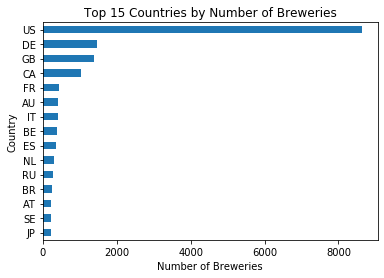

In [17]:
#View top 15 countries by number of total breweries
breweries.country.value_counts().head(15).plot(kind="barh",title="Top 15 Countries by Number of Breweries").invert_yaxis()
plt.xlabel("Number of Breweries")
plt.ylabel("Country")

#### Let's check out which US states have the most number of breweries
California has double the number of breweries than its closest competitor, Washington State. New York State, Colorado and Pennsylvania are close behind.
It's important to note that California has a much larger population than other states, which may explain why it has more breweries. In order to better compare states, we should standardize our population, which we will do later on in our analysis.

Text(0, 0.5, 'State')

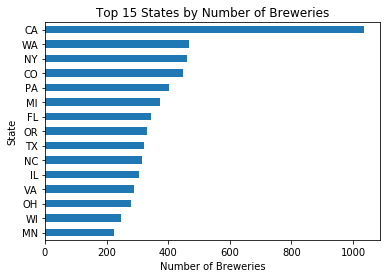

In [18]:
#First, filter our data to only include US breweries
us_breweries = breweries[breweries.country=="US"]
#Next, view top 15 US states by number of total breweries
us_breweries.state.value_counts().head(15).plot(kind="barh",title="Top 15 States by Number of Breweries").invert_yaxis()
plt.xlabel("Number of Breweries")
plt.ylabel("State")

#### Let's check out which cities have the most number of breweries
Portland has the most number of breweries, followed by London, San Diego, Denver and Chicago.

Text(0, 0.5, 'City')

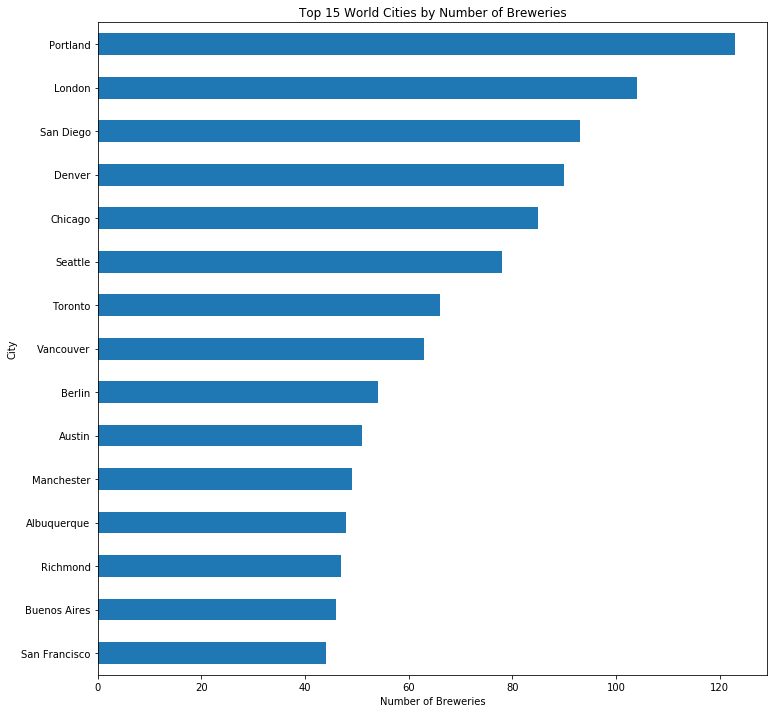

In [19]:
#View cities by number of breweries
breweries.city.value_counts().head(15).plot(kind="barh",title="Top 15 World Cities by Number of Breweries",figsize=(12,12)).invert_yaxis()
plt.xlabel("Number of Breweries")
plt.ylabel("City")

## Which states have the most breweries relative to population?
In order to answer this question, we can look at how many breweries per 100,000 residents a state has. Let's connect our census dataset with our breweries dataset, so that we can include population data in our analysis.

In [20]:
#Merge breweries with census_data
breweries_census = us_breweries.merge(census_data,left_on = "state",right_on="ABBREV")
breweries_census.head()

,id,name,city,state,country,notes,types,ABBREV,POPESTIMATE2018
0,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go",CA,39557045
1,41466,8one8 Brewing (818),Canoga Park,CA,US,No notes at this time.,"Brewery, Beer-to-go",CA,39557045
2,28724,Lewis Beer Company,Temecula,CA,US,No notes at this time.,Brewery,CA,39557045
3,45237,Sactown Union Brewery,Sacramento,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go",CA,39557045
4,38614,Escape Craft Brewery,Redlands,CA,US,No notes at this time.,"Brewery, Bar",CA,39557045


#### Next, let's group our datasets by state and show number of breweries next to state population

In [21]:
#Group our combined dataset by state and count the total number of breweries in each state
count_breweries = breweries_census.groupby("state").count()[["name","city"]]

#Group our combined dataset by state and show the population in each state
pop_states = breweries_census.groupby("state").mean()

#Now, merge these two datasets so that we can see number of breweries next to state population.
states_breweries_pop = count_breweries.merge(pop_states, left_on = "state", right_on="state")[["name","POPESTIMATE2018"]]

#Rename columns so that they are easier to understand
states_breweries_pop = states_breweries_pop.rename(columns={"name":"num_breweries","POPESTIMATE2018":"population"})
states_breweries_pop.head()


,num_breweries,population
state,,
AK,46,737438.0
AL,51,4887871.0
AR,34,3013825.0
AZ,127,7171646.0
CA,1035,39557045.0


#### In order to see breweries per 100,000 residents, we can create a new column that calculates that figure

In [22]:
#Calculate breweries per 100,000 residents
states_breweries_pop["breweries_per_100k"] = states_breweries_pop["num_breweries"]/states_breweries_pop["population"]*100000
states_breweries_pop.head()

,num_breweries,population,breweries_per_100k
state,,,
AK,46,737438.0,6.237813
AL,51,4887871.0,1.043399
AR,34,3013825.0,1.128135
AZ,127,7171646.0,1.770863
CA,1035,39557045.0,2.616475


#### Now, let's visualize our data to see which states have the most breweries per 100,000 residents
Vermont leads with about 16 breweries per 100,000 residents. Maine, Oregon, Colorado and Montana round out the top five. Nebraska has the fewest breweries, relative to its population. California, which we saw before had the highest total number of breweries, is near the middle of the pack when we take population into account.

Text(0, 0.5, 'State')

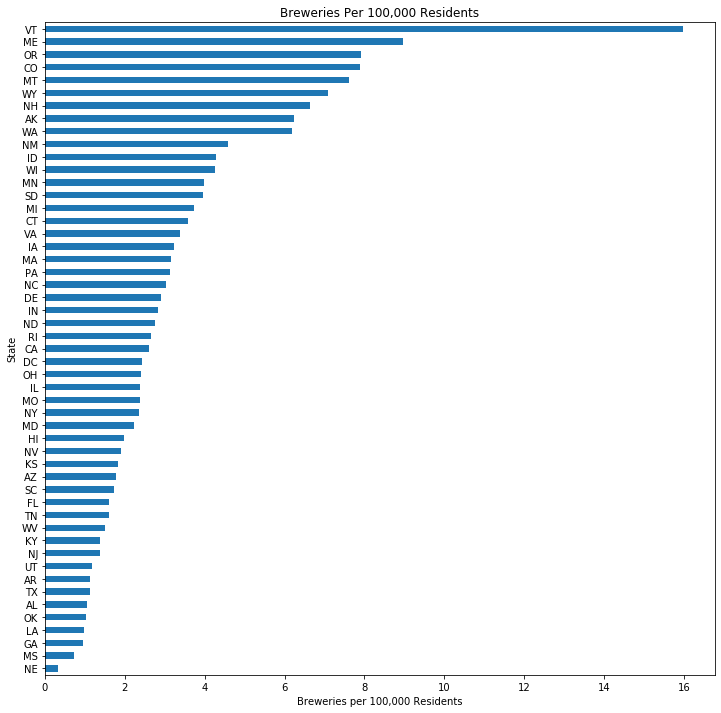

In [23]:
states_breweries_pop["breweries_per_100k"].sort_values(ascending=False).plot(kind="barh",figsize=(12,12),title="Breweries Per 100,000 Residents").invert_yaxis()
plt.xlabel("Breweries per 100,000 Residents")
plt.ylabel("State")

## Which breweries have the most number of beers?
In order to answer this question, let's connect our beers and breweries datasets

In [24]:
#Merge beers and breweries datasets
beers_breweries = beers.merge(breweries,right_on="id",left_on="brewery_id")
beers_breweries.head()

,id_x,name_x,brewery_id,state_x,country_x,style,availability,abv,notes_x,retired,id_y,name_y,city,state_y,country_y,notes_y,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,8.6,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,NaN,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,4.9,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,NaN,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"


#### Next, let's create a visualization that shows the top breweries by number of beers
Rock Bottom Restaurant & Brewery leads the pack, with over 1,200 in total number of beers! However, we should keep in mind that in our dataset, many of these beers are "retired," meaning they are no longer being served. If we want to see breweries by number of active beers, which are still being served, then we will need to remove retired beers.

Text(0, 0.5, 'Brewery')

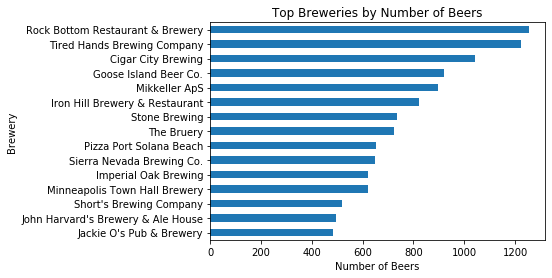

In [25]:
#Group dataset by brewery name and count the number of beers that are from that brewery
beers_breweries.groupby('name_y').count()["id_x"].sort_values(ascending=False).head(15).plot(kind="barh",title="Top Breweries by Number of Beers").invert_yaxis()
plt.xlabel("Number of Beers")
plt.ylabel("Brewery")

#### Let's repeat our last visualization, but this time remove retired beers
Rock Bottom Restaurant & Brewery still leads, with around 500 beers that they are actively serving. That's alot!

Text(0, 0.5, 'Brewery')

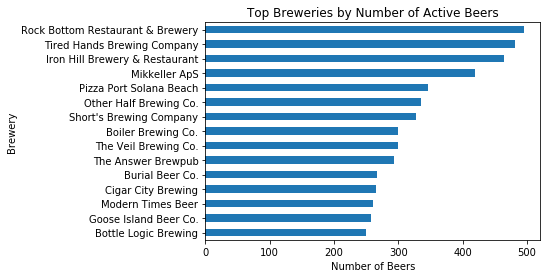

In [26]:
#Repeat the last step, but include only beers that are not retired
beers_breweries[beers_breweries["retired"]=="f"].groupby('name_y').count()["id_x"].sort_values(ascending=False).head(15).plot(kind="barh",title="Top Breweries by Number of Active Beers").invert_yaxis()
plt.xlabel("Number of Beers")
plt.ylabel("Brewery")

## How does alcoholic content differ by beer style?
To answer this question, let's look at the abv (alcohol by volum) column in beers.

Text(0, 0.5, 'ABV')

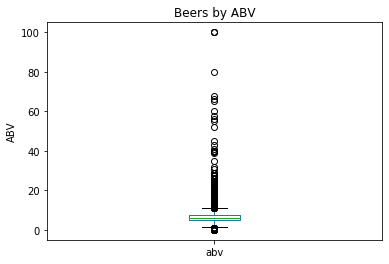

In [27]:
#Beers by abv boxplot (removing outliers)
beers["abv"].plot(kind="box",title="Beers by ABV")
plt.ylabel("ABV")

It looks like there are many outliers here, with some beers having abv has high as 60% to 100%! We can suspect this to be data entry errors, as the typical beer's abv is under 10%. Let's remove any abv values that are higher than our 99th percentile and recreate our boxplot. Once we do that, we see that the median beer has an abv of about 6%, with 50% of our values falling between about 5% and 8%. Some outliers exist below 1.5% and above 11%.

Text(0, 0.5, 'ABV')

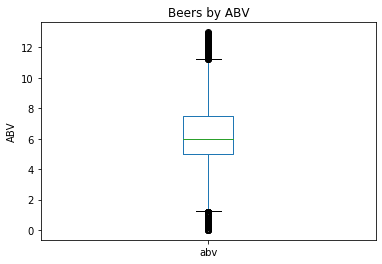

In [28]:
#Beers by abv boxplot (removing outliers)
beers["abv"][beers["abv"] < beers["abv"].quantile(.99)].plot(kind="box",title="Beers by ABV")
plt.ylabel("ABV")

Let's see how many styles of beers there are, so that we can compare how style relates to abv.

In [29]:
#Number of styles of beers
print("Number of Styles of Beer:",beers["style"].nunique())

Number of Styles of Beer: 112


Let's see what styles of beer are the most numerous, so that we can focus our abv comparisons on them.

Text(0, 0.5, 'Style of Beer')

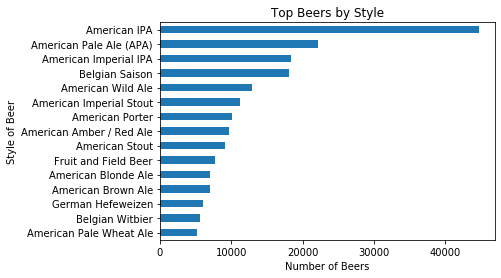

In [30]:
#Top styles of beers
beers.groupby('style').count()["id"].sort_values(ascending=False).head(15).plot(kind="barh",title="Top Beers by Style").invert_yaxis()
plt.xlabel("Number of Beers")
plt.ylabel("Style of Beer")

[]

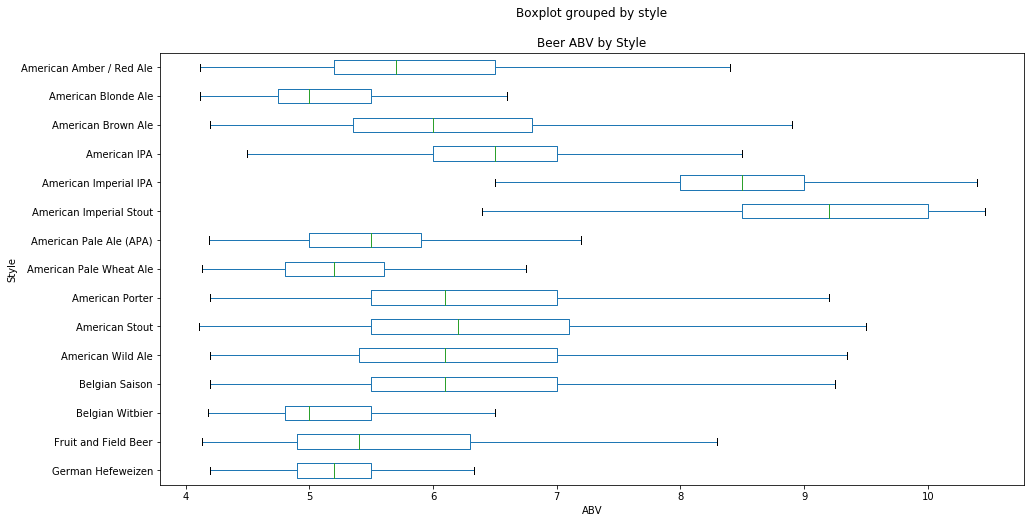

In [31]:
#Alcohol by volume of most numerous fifteen styles of beers
top_styles = ["American IPA", "American Pale Ale (APA)","American Imperial IPA","Belgian Saison","American Wild Ale",
             "American Imperial Stout","American Porter","American Amber / Red Ale", "American Stout", "Fruit and Field Beer",
             "American Blonde Ale","American Brown Ale","German Hefeweizen","Belgian Witbier","American Pale Wheat Ale"]
bp = beers[(beers["style"].isin(top_styles)) & 
           (beers["abv"] < beers["abv"].quantile(.95)) & 
            (beers["abv"] > beers["abv"].quantile(.05))].boxplot(column='abv', by='style', grid=False, figsize=(15,8),
              vert=False,showfliers=False).invert_yaxis()
plt.xlabel("ABV")
plt.ylabel("Style")
plt.title("Beer ABV by Style")
plt.plot()

## Which beers have the highest ratings?
To answer this, we'll connect our beers data with our reviews data. When we do that, we notice that beers have several different categories on which they are rated. We should see which beers lead in each category.

In [32]:
#Create a new dataframe that combines beer data with each beers average ratings
beers_reviews = reviews.merge(beers, left_on = "beer_id", right_on = "id")
beers_reviews_ratings = beers_reviews.groupby("name").mean()
beers_reviews_count = beers_reviews.groupby("name").count()
beers_reviews_ratings_count = beers_reviews_ratings.merge(beers_reviews_count,left_on = "name", right_on = "name")[["overall_x","look_x","smell_x","taste_x","feel_x","id_y","brewery_id_x"]]
beers_reviews_ratings_count = beers_reviews_ratings_count.rename(columns={"overall_x":"overall","look_x":"look",
                                                                          "smell_x":"smell","taste_x":"taste","feel_x":"feel","id_y":"num_ratings","brewery_id_x":"brewery_id"})
beers_reviews_ratings_count.head()

,overall,look,smell,taste,feel,num_ratings,brewery_id
name,,,,,,,
!,4.238636,4.265152,4.223485,4.238636,4.196970,66,33510.0
! (Old Ale),NaN,NaN,NaN,NaN,NaN,2,10902.0
!!!PA Simcoe Mosaic,3.461538,3.500000,3.461538,3.423077,3.519231,13,24299.0
!!C&G,4.166667,4.083333,4.250000,4.333333,4.166667,3,24299.0
"!!PA Citra, Centennial & Cascade",NaN,NaN,NaN,NaN,NaN,2,24299.0


Now that we have our data ready, let's visualize the top beers by each category. Let's only include beers that have at least 50 reviews, so that we know we are only looking at beers that have been vetted by a significant number of people.

C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


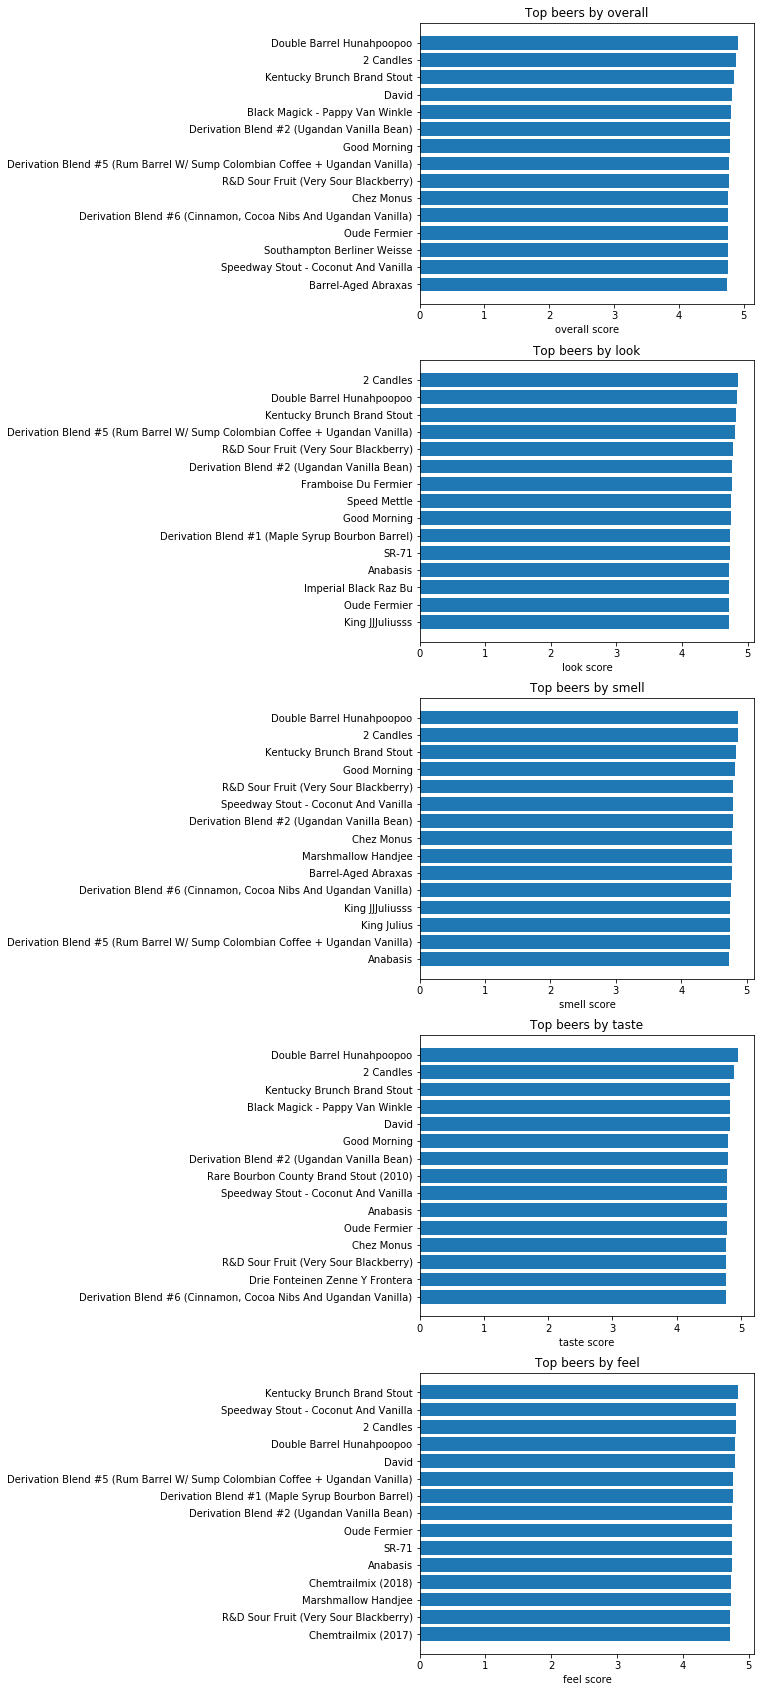

In [33]:
#Visualize top beers by each category
fig = plt.figure(figsize=(6,30))
i=1
for category in ["overall","look","smell","taste","feel"]:
    beer_ratings = beers_reviews_ratings_count[category][beers_reviews_ratings_count["num_ratings"]>=50].sort_values(ascending=False)
    sub = fig.add_subplot(5,1,i)
    sub.set_xlabel(f'{category} score')
    sub.set_title(f"Top beers by {category}")
    sub.barh(y=beer_ratings.index[:15],width=beer_ratings.values[:15])
    sub.invert_yaxis()
    i+=1
plt.tight_layout()

Double Barrel Hunahpoopoo earned the top score in the categories of overall, smell and taste. Several beers appear on multiple lists, which shows that beers that score high in one category tend to score high in others.

## Which breweries have the highest ratings?
Similar to our last question, we want to see which breweries have the most highest ratings. To answer this question, let's connect our beers, breweries and reviews datasets.

In [34]:
#Merge breweries with our combined dataset used in the last question
breweries_ratings = beers_reviews_ratings_count.merge(breweries, left_on = "brewery_id", right_on = "id")
breweries_ratings.head()

C:\Users\Dennis\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:938: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,overall,look,smell,taste,feel,num_ratings,brewery_id,id,name,city,state,country,notes,types
0,4.238636,4.265152,4.223485,4.238636,4.196970,66,33510.0,33510,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"
1,4.578652,4.588015,4.585206,4.602060,4.564607,267,33510.0,33510,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"
2,4.183824,4.132353,4.169118,4.169118,4.176471,34,33510.0,33510,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"
3,4.257353,4.235294,4.264706,4.264706,4.257353,34,33510.0,33510,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"
4,4.276316,4.302632,4.236842,4.276316,4.236842,19,33510.0,33510,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"


In [35]:
#Next, simplify this dataset so that its labels are clear and it contains only the info that we need
breweries_beers = breweries.merge(beers, left_on = "id", right_on = "brewery_id")
breweries_beers_reviews = breweries_beers.merge(reviews, left_on = "id_y", right_on = "beer_id")
breweries_beers_reviews_count = breweries_beers_reviews.groupby("name_x")["id_x"].count()
breweries_beers_reviews_mean = breweries_beers_reviews.groupby("name_x")[["look","smell","taste","feel","overall","score","brewery_id"]].mean()
bbr_count_mean = breweries_beers_reviews_mean.merge(breweries_beers_reviews_count, left_on = "name_x", right_on = "name_x")
bbr_count_mean["num_ratings"]= bbr_count_mean["id_x"]
bbr_count_mean = bbr_count_mean[["look","smell","taste","feel","overall","score","num_ratings"]]
bbr_count_mean.head()

,look,smell,taste,feel,overall,score,num_ratings
name_x,,,,,,,
#Freedom Brewery,2.500000,2.550000,2.000000,2.700000,2.300000,2.682500,16
'A Magara,NaN,NaN,NaN,NaN,NaN,3.277500,8
't Hofbrouwerijke,3.855769,3.709135,3.651442,3.627404,3.692308,3.666571,210
(512) Brewing Company,4.000754,3.939714,3.990015,3.915787,3.972683,4.014783,3255
"0,5 Pub",NaN,NaN,NaN,NaN,NaN,3.300000,1


C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


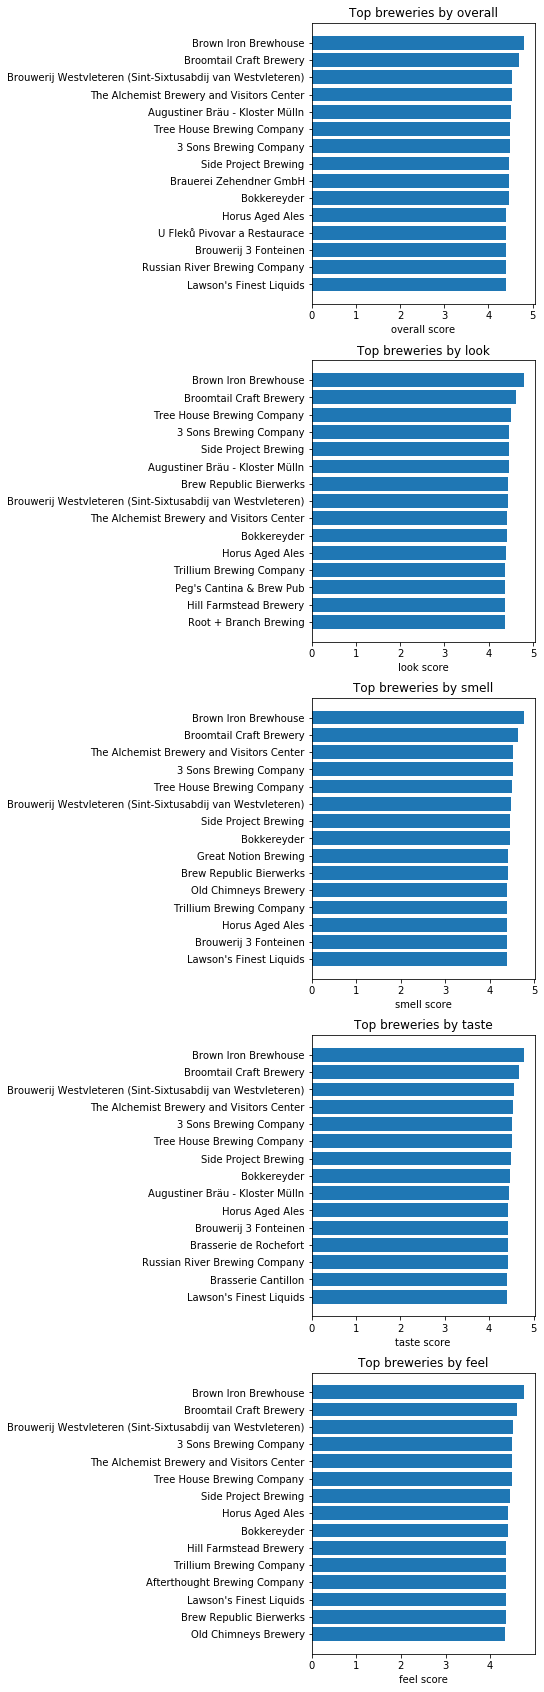

In [36]:
#Visualize top breweries by each category
fig = plt.figure(figsize=(4,30))
i=1
for category in ["overall","look","smell","taste","feel"]:
    breweries_ratings = bbr_count_mean[category][bbr_count_mean["num_ratings"]>=50].sort_values(ascending=False)
    sub = fig.add_subplot(5,1,i)
    sub.set_xlabel(f'{category} score')
    sub.set_title(f"Top breweries by {category}")
    sub.barh(y=breweries_ratings.index[:15],width=breweries_ratings.values[:15])
    sub.invert_yaxis()
    i+=1
plt.tight_layout()

Brown Iron Brewhouse was the top brewery in all categories, with Broomtail Craft Brewery placing second in each category.

## Which countries, states and cities have the highest ratings?
Let's expand our ratings comparison and see which places have the highest rated beers

#### Countries with highest ratings

In [37]:
#Take our last question's data set and group by country, instead of brewery
bbr_country_count = breweries_beers_reviews.groupby("country_x")["id_x"].count()
bbr_country_mean = breweries_beers_reviews.groupby("country_x")[["look","smell","taste","feel","overall","score"]].mean()
bbr_country_count_mean = bbr_country_mean.merge(bbr_country_count,left_on = "country_x", right_on = "country_x")
bbr_country_count_mean = bbr_country_count_mean.rename(columns={"id_x":"num_ratings"})
bbr_country_count_mean.head()

,look,smell,taste,feel,overall,score,num_ratings
country_x,,,,,,,
AD,3.142857,3.160714,2.964286,3.017857,3.321429,3.176296,27
AE,NaN,NaN,NaN,NaN,NaN,1.940000,2
AG,3.058333,2.808333,3.041667,3.008333,3.208333,2.952115,52
AL,3.253165,2.939873,3.006329,3.025316,3.104430,3.093208,106
AM,3.254717,2.899371,2.907233,3.006289,2.962264,2.974698,232


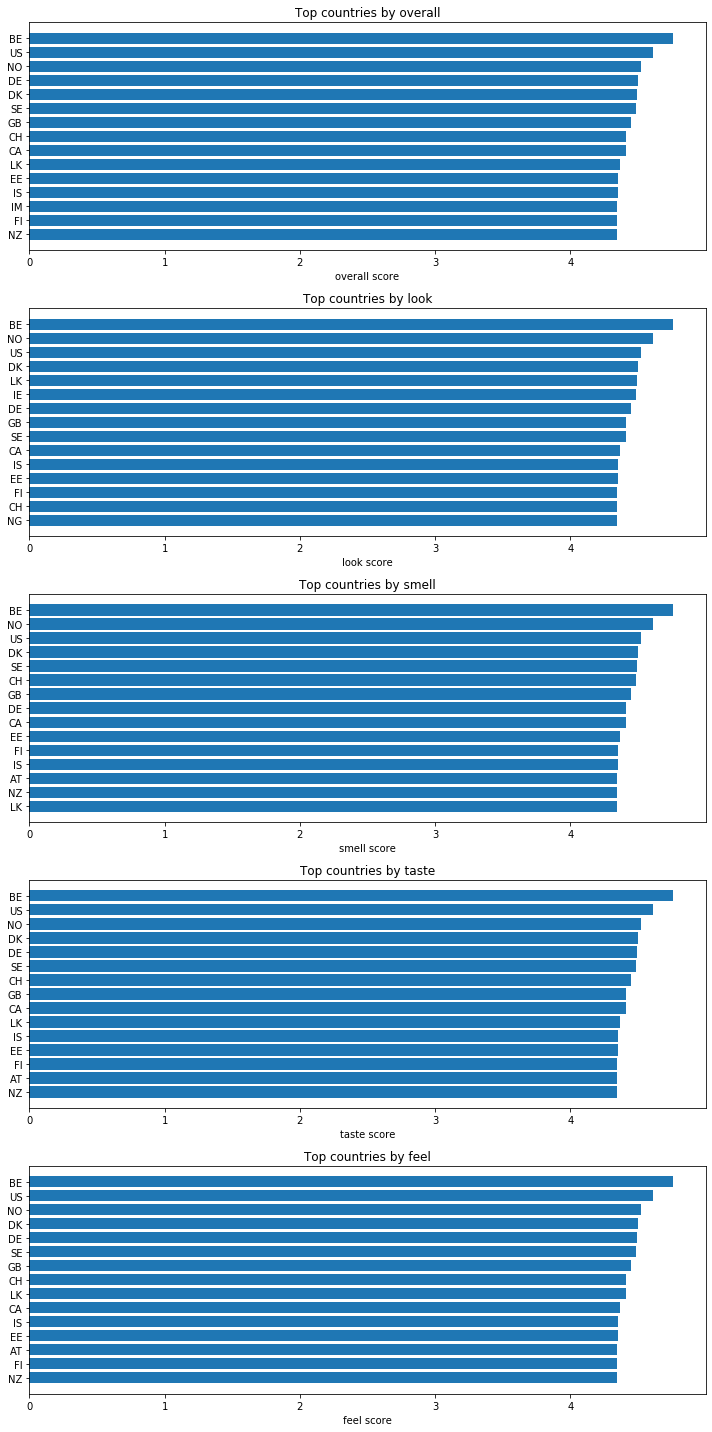

In [38]:
#Visualize top countries by each category
fig = plt.figure(figsize=(10,20))
i=1
for category in ["overall","look","smell","taste","feel"]:
    country_ratings = bbr_country_count_mean[category][bbr_country_count_mean["num_ratings"]>=50].sort_values(ascending=False)
    sub = fig.add_subplot(5,1,i)
    sub.set_xlabel(f'{category} score')
    sub.set_title(f"Top countries by {category}")
    sub.barh(y=country_ratings.index[:15],width=breweries_ratings.values[:15])
    sub.invert_yaxis()
    i+=1
plt.tight_layout()

Belgium scored the highest in each category, with the US, Norway and Denmark scoring close behind

#### States with highest ratings

In [39]:
#Take our last question's data set and group by state
bbr_country_count = breweries_beers_reviews.groupby("state_x")["id_x"].count()
bbr_country_mean = breweries_beers_reviews.groupby("state_x")[["look","smell","taste","feel","overall","score"]].mean()
bbr_country_count_mean = bbr_country_mean.merge(bbr_country_count,left_on = "state_x", right_on = "state_x")
bbr_country_count_mean = bbr_country_count_mean.rename(columns={"id_x":"num_ratings"})
bbr_country_count_mean.head()

,look,smell,taste,feel,overall,score,num_ratings
state_x,,,,,,,
AB,3.698578,3.614129,3.659235,3.630522,3.672833,3.624972,10580
AK,3.983917,3.953291,3.981598,3.939456,3.972763,3.958018,36274
AL,3.920596,3.840696,3.876354,3.834126,3.863906,3.841436,12872
AR,3.949742,3.868643,3.912629,3.881615,3.913832,3.831909,4024
AZ,3.756883,3.670588,3.680515,3.663399,3.674387,3.670982,21653


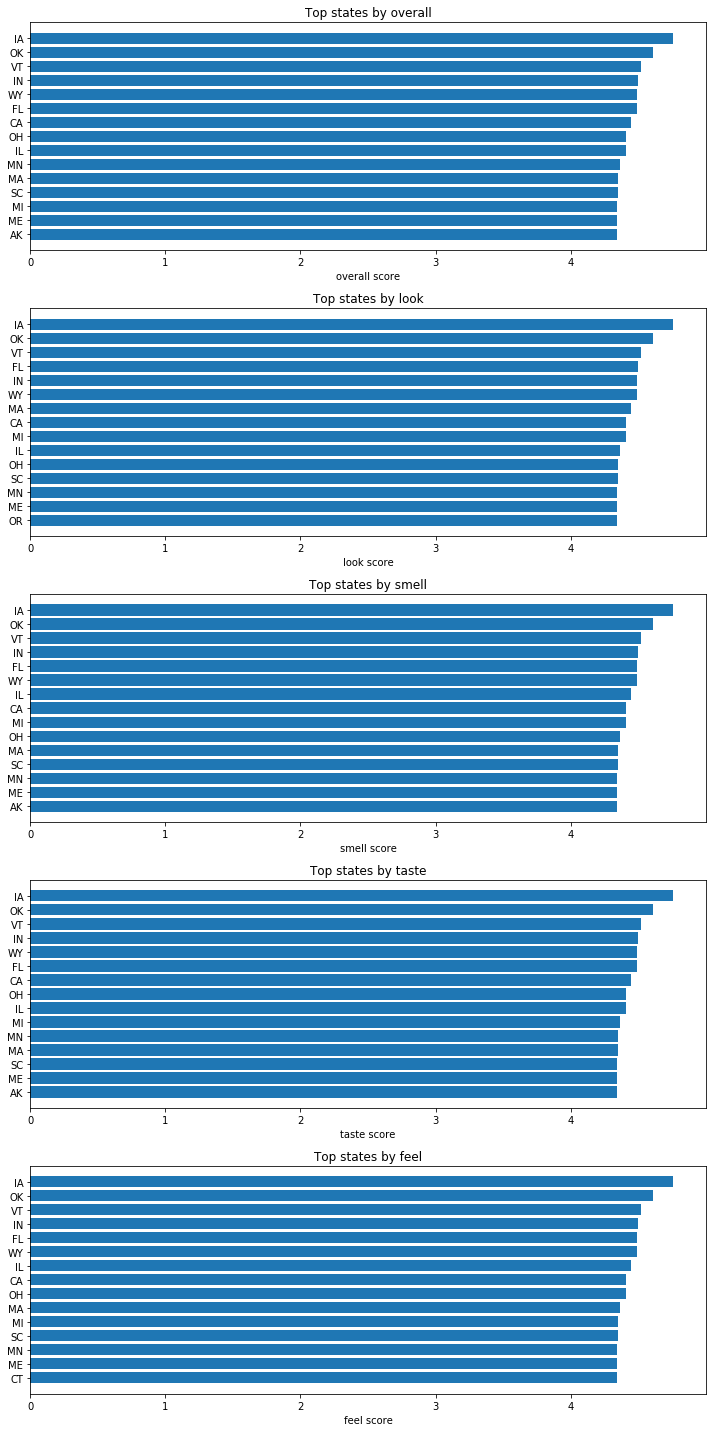

In [40]:
#Visualize top countries by each category
fig = plt.figure(figsize=(10,20))
i=1
for category in ["overall","look","smell","taste","feel"]:
    state_ratings = bbr_country_count_mean[category][bbr_country_count_mean["num_ratings"]>=50].sort_values(ascending=False)
    sub = fig.add_subplot(5,1,i)
    sub.set_xlabel(f'{category} score')
    sub.set_title(f"Top states by {category}")
    sub.barh(y=state_ratings.index[:15],width=breweries_ratings.values[:15])
    sub.invert_yaxis()
    i+=1
plt.tight_layout()

Iowa leads in all categories, with Oklahoma and Vermont close behind.

#### Cities with highest ratings

In [41]:
#Take our last question's data set and group by city
bbr_country_count = breweries_beers_reviews.groupby("city")["id_x"].count()
bbr_country_mean = breweries_beers_reviews.groupby("city")[["look","smell","taste","feel","overall","score"]].mean()
bbr_country_count_mean = bbr_country_mean.merge(bbr_country_count,left_on = "city", right_on = "city")
bbr_country_count_mean = bbr_country_count_mean.rename(columns={"id_x":"num_ratings"})
bbr_country_count_mean.head()

,look,smell,taste,feel,overall,score,num_ratings
city,,,,,,,
's-Hertogenbosch,NaN,NaN,NaN,NaN,NaN,3.490000,2
Aachen,3.81250,3.750000,3.937500,3.937500,3.812500,3.521429,7
Aalborg,3.87037,3.601852,3.796296,3.888889,3.777778,3.644773,44
Aalen,NaN,NaN,NaN,NaN,NaN,2.950000,2
Aalsmeer,NaN,NaN,NaN,NaN,NaN,3.700000,2


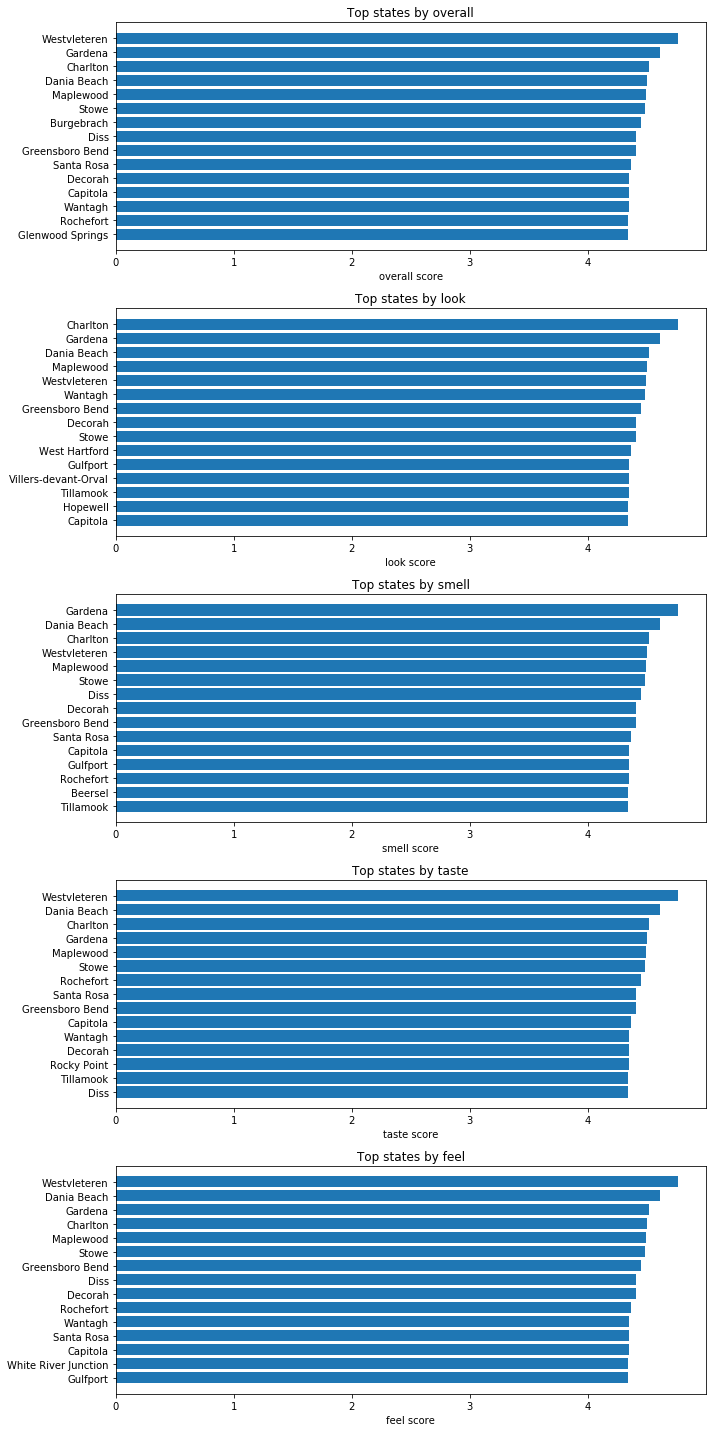

In [42]:
#Visualize top cities by each category
fig = plt.figure(figsize=(10,20))
i=1
for category in ["overall","look","smell","taste","feel"]:
    city_ratings = bbr_country_count_mean[category][bbr_country_count_mean["num_ratings"]>=50].sort_values(ascending=False)
    sub = fig.add_subplot(5,1,i)
    sub.set_xlabel(f'{category} score')
    sub.set_title(f"Top states by {category}")
    sub.barh(y=city_ratings.index[:15],width=breweries_ratings.values[:15])
    sub.invert_yaxis()
    i+=1
plt.tight_layout()

Westvleteren leads in overall, taste and feel. Gardenia, Charlton and Dania Beach are also highly rated.

## Conclusion
Through our analysis, we have answered many of the questions posed at the beginning:

 -  The US has the most number of breweries, California is the state that has the most and Portland is the city with the most.
 -  Vermont has the most number of breweries per 100,000 residents.
 -  Rock Bottom Restaurant and brewery has the most number of beers.
 -  While most beer styles have an abv from around 5% to 8%, American Imperial IPAs and Stouts have much higher abv.
 -  Double Barrel Hunnahpoopoo is the most highly rated beer.
 -  Brown Iron Brewhouse is the most highly rated brewery.
 -  Belgium's beers have the highest overall ratings of any country.
 -  Iowa's beers have the highest overall ratings of any state.
 -  Westvleteren's beers have the highest overall ratings of any city.

There are countless other questions that we can pose and answer with this dataset, and beer lovers should consider using this as a way to learn more and scope out new beers and breweries to try!